# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [ ]:
import numpy as np
import pandas as pd

In [76]:
from numpy.ma.core import arange

reference_sequence = 'KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL'
print(len(reference_sequence))

alignments = open('data/seqdump.txt')



lines = alignments.readlines()
n_lines = len(lines)


sequences = []

for idx, line in enumerate(lines):
    if line.startswith('>'):  
        current_sequence = ""
        i = 1
        while (idx + i) < n_lines and not lines[idx + i].startswith('>'):  # continua fino alla prossima '>'
            current_sequence += lines[idx + i].strip()  # rimuove newline
            i += 1
        sequences.append(current_sequence)



129


In [106]:

# here in the sequences vector we have all the aligned sequences. We now need to count and report the less stable positions, from an evolutionary point of view.

# We first check  if all sequences have the same length

lengths = []

for sequence in sequences:
    lengths.append(len(sequence))
# print(lengths)
# we observe that 100 is the length of all sequence---> strange, not correct!!! In the presentation we have 
most_common = []
frequencies = []
for position in range(129):
    amminoacids = []
    for sequence in sequences:
        # we need to count the number of the same amminoacid
        if position<len(sequence):
            amminoacids.append(sequence[position])
        else: 
            amminoacids.append(str('no amminoacid here'))

    unique, counts = np.unique(amminoacids, return_counts=True)
    frequencies.append(np.max(counts)/100)
    most_common_idx = np.argmax(counts)
    most_common.append(unique[most_common_idx])

positions = range(129)

    

In [119]:
# my idea here is to add to this dataframe also the result we got from other methods like 
# RMSF analysis, 
our_sequence = []
difference = []
for idx, elem in enumerate(reference_sequence):
    our_sequence.append(elem)
    difference.append(elem == most_common[idx])

# our protein is equal to our reference amminoacid

df = pd.DataFrame({
    'positions': positions,
    '2LYZ_sequence': our_sequence, 
    'most_common_amminoacid': most_common,
    'frequency': frequencies   
})

df


,positions,2LYZ_sequence,most_common_amminoacid,frequency
0,0,K,K,0.96
1,1,V,V,0.96
2,2,F,F,0.75
3,3,G,G,0.96
4,4,R,R,0.96
...,...,...,...,...
124,124,R,R,0.91
125,125,G,G,0.95
126,126,C,C,0.95
127,127,R,R,0.94


In [120]:
print(reference_sequence)

KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRNTDGSTDYGILQINSRWWCNDGRTPGSRNLCNIPCSALLSSDITASVNCAKKIVSDGNGMNAWVAWRNRCKGTDVQAWIRGCRL


In [126]:
rmsf_df = pd.read_csv('data/rmsf.dat')
df["rmsf"] = rmsf_df["rmsf"]


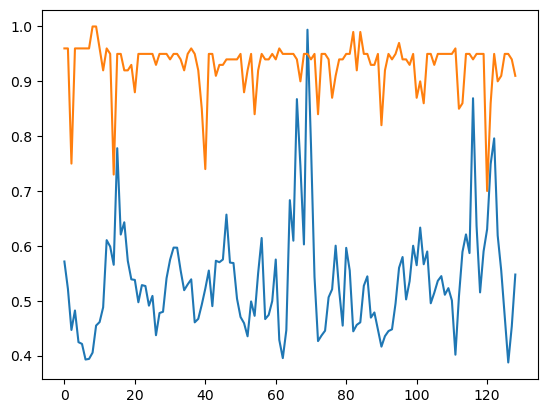

In [132]:
import matplotlib.pyplot as plt

plt.plot(df["positions"], df["rmsf"])
plt.plot(df["positions"], df["frequency"])
plt.show()